## End-to-end Multi-class Dog Breed Classification

This notebook builds an end-to-end mulkti-class images classsifier using TensorFlow 2.0 and TensorFlow hub 

## 1. Problem 

Identifying the breed of a dog given an image of Dog.
When I'm sitiing at acfe and I take a photo of a dog , I want to know what breed of dog it is 

## 2. Data 

The data we're using is from kaggle's dog breed identification competition. 

https://www.kaggle.com/competitions/dog-breed-identification/data 

## 3. Evaluation 
The evaluation is a file with prediction probabilities for each dog breed of each test image.

https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation 

## 4. Features 

some infromation about the data:

* we are dealing with images(unstructured data) so it's probably best we use deep learning/transfer learning 
* There are 120 breeds of dogs(this means there are 120 different classes)
* There are around 10,000+ images in Training set(These images have labels)
* There are around 10,000+ images in the test set(these images have no labels,because we'll want to predicty them)


In [ ]:
# unzip the uploaded data into Google Drive
#!unzip "drive/MyDrive/Dog-vision/dog-breed-identification.zip" -d "drive/MyDrive/Dog-vision"

## Get our workspace ready 

* Import TensorFlow 2.x
* Import TensorFlow Hub
* Make sure we're using a GPU


In [ ]:
# Import TesnorFlow into Colab 
import tensorflow as tf 
print("TF version:", tf.__version__)

TF version: 2.9.2


In [ ]:
## if we have older vesrion , we can update using foloowing code in colab, we have to upadte manually in jupyter 
# Import TF 2.x
# try: 
#   # %tensorflow_version only exists in colab
#   %tensorflow_version 2.X
#   except Exception:
#     pass

In [ ]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version:",tf.__version__)
print("TF Hub version:", hub.__version__)

#check for GPU availability
print("GPU", "available (YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.9.2
TF Hub version: 0.12.0
GPU not available :(


## getting our data ready (turning into tensors)

with all machine learning model,our data has to be in  numerical format. so that's why we'll be doing first. Turning our imgaes into Tensors(numerical representations).

Let's start by accessing our data and checking out the labels:



In [ ]:
#Checkout the labels of our data 
import pandas as pd
labels_csv=pd.read_csv("drive/MyDrive/Dog-vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())            #just like an following code, but we can use print as well

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
labels_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


In [ ]:
labels_csv.describe()

,id,breed
count,10222,10222
unique,10222,120
top,000bec180eb18c7604dcecc8fe0dba07,scottish_deerhound
freq,1,126


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
labels_csv["breed"].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

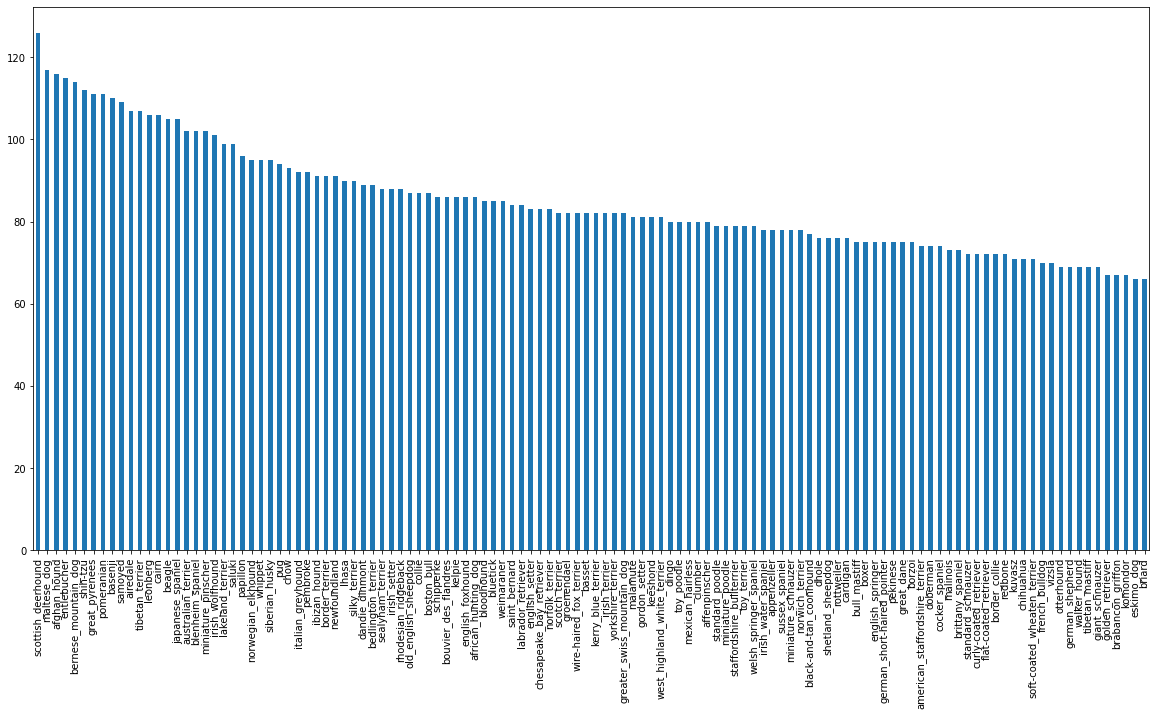

In [ ]:
labels_csv.breed.value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv["breed"].value_counts().median()     #its good start,google suggest we should have at least 10 images of each label class 

82.0

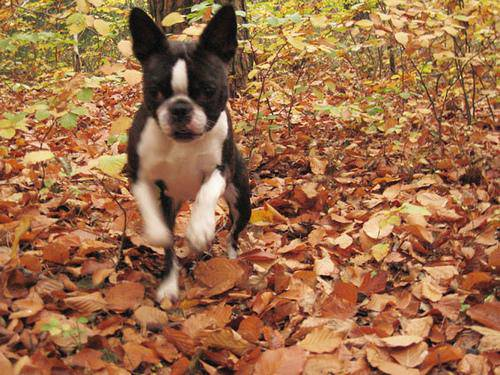

In [ ]:
#3 Let's view an image 
from IPython.display import Image
Image("drive/MyDrive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

## Getting images and their labels.

Let's get a list of all of our images file pathnames


In [ ]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# careate path names(list) from image ID's

filenames=["drive/MyDrive/Dog-vision/train/" + fname +".jpg" for fname in labels_csv["id"]]    #create a list of filename for images id's
                                                                                              #we can use i instead of fname so it will basically create a loop 
#check the first 10
filenames[:10]

['drive/MyDrive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether number of filenmae matches with number of actual image files
import os
if len(os.listdir("drive/MyDrive/Dog-vision/train/"))==len(filenames):
  print("Filnames match actual amount of files!!! proceed")
else:
  print("Filnames does not match actual amount of files, check the target directory")

Filnames does not match actual amount of files, check the target directory


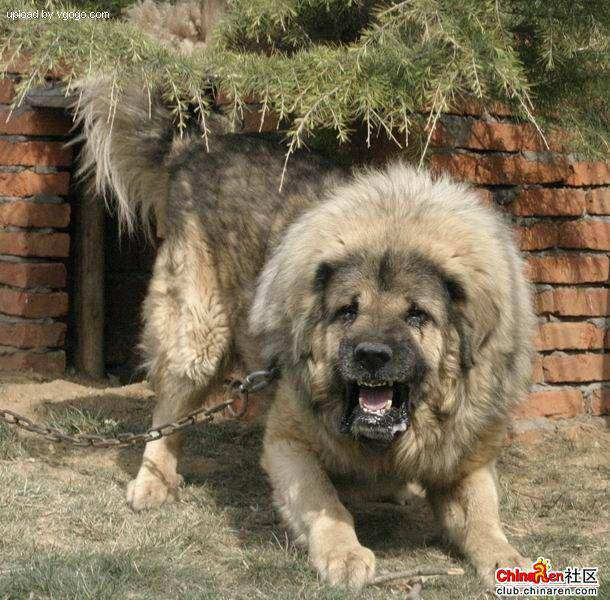

In [ ]:
# one more check 
Image(filenames[9000])

In [ ]:
labels_csv["breed"][9000]

'tibetan_mastiff'

In [ ]:
import numpy as np
# labels=labels_csv["breed"]
# labels   #it will creats label but not in numpy array 

labels=labels_csv["breed"].to_numpy()
# labels=np.array(labels)    #does the same as above 
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# see if number of labels is equal to number of filenames 

if len(labels)==len(filenames):
  print("Number of labels matches number of filenames")
else:
  print("Number of labels doesn't match number of filenames,check data directory")

Number of labels matches number of filenames


In [ ]:
# Find the unique label values
import numpy as np
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn a single label into am array of booleans

print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every labels into boolean array
boolean_labels=[label==unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
#Example turining boolean array into integers 
print(labels[0])  #Original label
print(np.where(unique_breeds==labels[0])) #index where label occurs
print(boolean_labels[0].argmax())  #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs 

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[2])
print(boolean_labels[2].astype(int))

pekinese
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
boolean_labels[:2]   #firsdt two boolean lables array ouot of 10222

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

##creating our own validation set 

since the dataset from kaggle doesn't come with a validation set, we are going to create our own. 
just like we did iot in scikit learn

In [ ]:
#setup x & y variables 
#beacuse remembering boolan_labels and filenames is tidios so we wanna create x and y
x=filenames
y=boolean_labels

In [ ]:
len(filenames)

10222

In [ ]:
len(x)

10222

we are going to start of expermenting with 1000 images and we gonna increase as needed

As we are going to do experments and it would be difficult to go with 10000 images as it will increase time for experimenting.. so we have craeted slider as bellow 

In [ ]:
#Set number of images to use for experimenting 
NUM_IMAGES=1000 #@param {type:"slider", min:1000, max:10000,step:1000}

#Advantages of colab over jupyter, ofcourse it has strong GPU as well 

In [ ]:
#Let's split our data into traing and validation sets
from sklearn.model_selection import train_test_split

#np.random.seed(42)
#Split them into traing and validation of total size NUM_IMAGES
x_train,x_val, y_train,y_val=train_test_split(x[:NUM_IMAGES],
                                              y[:NUM_IMAGES],
                                              test_size=0.20,
                                              random_state=42)

In [ ]:
len(x_train),len(x_val),len(y_train),len(y_val)

(800, 200, 800, 200)

In [ ]:
#Let's have a geez at the training data
x_train[:2],y_train[:2]   ##X means filename(filepath of Dog images) and y means boolean_labels which decides type of breed for each dog 

(['drive/MyDrive/Dog-vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Dog-vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing images (Turining images into Tensors)
Tensors are numerical representation like a metrix.

To Preprocess our images into tensors we 're going to write a function whcih does a few things:
1. Take an images filepath as input
2. USe TEnsorFlow to read the file and save it to a variable, `image`
3. Turn our `image` (a jpg) into Tensor
4. Resize the `image` to be a shape of (224,224)
5. Return the modified `image` 

Before we do,let's see what importing an image looks like

In [ ]:
# convert images to numpy array

from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape  #height,width,colour channel

(257, 350, 3)

In [ ]:
image 


array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [ ]:
image.max(),image.min()   #pixel values between 0 and 255

(255, 0)

In [ ]:
#this images is in numpy array , let's turn into tensors
#Tensor are very similar to numpy array , we can turn almost anything into tensors by tf.tensor

In [ ]:
#Turn image into Tesnor 
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [ ]:
image[:2] #image upto 2 

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)

In [ ]:
tf.constant(image[:2])  #tensors in tensor flow has GPU ,which is lot more faster to find pattern from these numbers compared to CPU

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

Now we've seen what an image look like  as a Tensor,let's make a funtion to preproces them.

1. Take an image filepath as input 
2. USe TensorFlow to read the file and save it to a variable `image`
3. Turn `image` (a jpg) into Tensor 
4. Normalize our image (convert colour channel from 0-255 to 0-1)
5. Resize the `image` to be a shape of (224,224)
6. Return the modified `image`



In [ ]:
# Definr image size
IMG_SIZE=224

#create a function for preporcessing images 
def process_image(image_path,img_size=IMG_SIZE):
  """
  Takes an image file path and turns the image into a Tensor.
  """

  # Read in an iamge file 
  image=tf.io.read_file(image_path)
  # Turn the jpeg image into Numerical Tensor with 3 colour channels (Red,Green,Blue) 
  image=tf.image.decode_jpeg(image,channels=3)
  # Convert the colur channel value form 0-255 to 0-1 values (Normalize)
  image=tf.image.convert_image_dtype(image,tf.float32)
  # REsize the image to our desired value 9224,244)square
  image=tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  
  return image


In [ ]:
# best underrstanding of a function, we cna check the code of each line to get clear ideas 
tensor=tf.io.read_file(filenames[26])
tensor


<tf.Tensor: shape=(), dtype=string, numpy=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\xf4\x01w\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca

In [ ]:
tf.image.decode_jpeg(tensor,channels=3)

<tf.Tensor: shape=(500, 375, 3), dtype=uint8, numpy=
array([[[ 59,  68,  65],
        [ 64,  73,  70],
        [ 71,  80,  77],
        ...,
        [115, 128, 108],
        [115, 128, 108],
        [110, 123, 103]],

       [[ 65,  74,  71],
        [ 72,  81,  78],
        [ 79,  88,  85],
        ...,
        [114, 127, 107],
        [117, 130, 110],
        [116, 129, 109]],

       [[ 68,  77,  74],
        [ 76,  85,  82],
        [ 83,  92,  89],
        ...,
        [114, 127, 107],
        [120, 133, 113],
        [123, 136, 116]],

       ...,

       [[173, 200, 155],
        [164, 179, 136],
        [181, 166, 133],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[142, 159, 117],
        [147, 154, 113],
        [189, 174, 141],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[167, 179, 139],
        [167, 172, 132],
        [204, 188, 155],
        ...,
        [255, 255, 25

In [ ]:
tf.image.convert_image_dtype(tensor, tf.float32)

ValueError: ignored

## Turning our data into Batches

why turn our data into batches?
Let's say you are trying to process 10,000+ images in one go... it might not fit into memory. GPU has limited amount of RAM 

so that'y why about 32 images (this is Batch size) at a time. (we can manually adjust the batch size if need be) 

In order to use TensorFlow effectively, we need our data in the form of Tensor tuples which look like this: 
`(image,label)`  #image in the form of tensor and it's label as a pairs...

In [ ]:
# create a simple function to return a tuple(iamge,label)
def get_image_label(image_path,label):
  """
  Takes an image file path name and the associated label,
  Processes the image and returns a tuple of (image,label)
  """
  image=process_image(image_path)
  return image,label 

In [ ]:
# Demo of the above 
(process_image(x[42],y[42]))  # x and y is filenames and boolean_labels respectively 

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3264178 , 0.5222886 , 0.3232816 ],
        [0.2537167 , 0.44366494, 0.24117759],
        [0.25699762, 0.4467087 , 0.23893751],
        ...,
        [0.29325107, 0.5189916 , 0.3215547 ],
        [0.29721776, 0.52466875, 0.33030328],
        [0.2948505 , 0.5223015 , 0.33406618]],

       [[0.25903144, 0.4537807 , 0.27294815],
        [0.24375686, 0.4407019 , 0.2554778 ],
        [0.2838985 , 0.47213382, 0.28298813],
        ...,
        [0.2785345 , 0.5027992 , 0.31004712],
        [0.28428748, 0.5108719 , 0.32523635],
        [0.28821915, 0.5148036 , 0.32916805]],

       [[0.20941195, 0.40692952, 0.25792548],
        [0.24045378, 0.43900946, 0.2868911 ],
        [0.29001117, 0.47937486, 0.32247734],
        ...,
        [0.26074055, 0.48414773, 0.30125174],
        [0.27101526, 0.49454468, 0.32096273],
        [0.27939945, 0.5029289 , 0.32934693]],

       ...,

       [[0.00634795, 0.03442048, 0.0258106 ],
        [0.01

In [ ]:
# in above Tuple, image is in a tensor we have pass it to process_image ,but label is not in a tensor yet 
(process_image(x[42]),tf.constant(y[42]))

## we have got `Tuple` of image and lable pair in the form of Tensor...

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117759],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we 've got a way to turn  our data into tuples of tesnors in the form of : `(image,label)`

Let's make a function to turn all of our data (`x` and `y`) into batches!

In [ ]:
# define the abtch size
BATCH_SIZE=32    #which is default batch size

# Create a fucntion to turn data into batches 
def create_data_batches(x,y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image(x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input(no labels).
  """
  # If the data is a test dataset, we probably don't have labels.
  if test_data:
    print("Creating test data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))  #only filepaths (no labels)
    data_batch=data.map(process_image).batch(BATCH_SIZE)
    return data_batch

  # if the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating a validation data batches....")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),   #filepaths
                                           tf.constant(y)))    #Labels 
    data_batch=data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches....")
    # Turn filepaths and labels into Tensors 
    data= tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                            tf.constant(y)))
    # Shuffling filepaths and labels before mapping image processor function is faster than shuffling images
    data=data.shuffle(buffer_size=len(x))

    #Create (image,label) tuples (this also turns the image path into a predprocessaed image)
    data=data.map(get_image_label)

    # Turn the traing data into batches 
    data_batch=data.batch(BATCH_SIZE)

  return data_batch


In [ ]:
#create training and validation data batches
train_data=create_data_batches(x_train,y_train)
val_data=create_data_batches(x_val,y_val,valid_data=True)

Creating training data batches....
Creating a validation data batches....


In [ ]:
# Check out tyhe different attribut of our data batches 
train_data.element_spec, val_data.element_spec

# which means, now our images are in batches of 32(None, which is flexible that'y )sahpe of 224,224 and 3 colours RGB
#we got tuple of image ,(image,labels) pairs in teh form of tensors 
# LAbels has also batch sahpe of 32,None, and it has imentions of 120 as dog breeds,
###same applicable to validation data 

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
y[0]  # there is 120 dog breeds as a label 

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

##  Visualizing data batches 

Our data is now in batches,there can be little hard to understand/comprehend
Let's visualize them 

In [ ]:
import matplotlib.pyplot as plt

# careate a function for viewing immages in a data batch 
def show_25_images(images,labels):
  """
  Display a plot of 25 images and their labels from a data batch
  """
  #setup the figure 
  plt.figure(figsize=(10,10))
  # Loop through 25 (for displaying 25 images) 
  for i in range(25):
    # Create a subplot (5 rows, 5 columns)
    ax=plt.subplot(5,5,i+1)
    # Display an image
    plt.imshow(images[i])
    # Add the image lable as a title 
    plt.title(unique_breeds[labels[i].argmax()])
    # Turn the grid lines off
    plt.axis("off")

In [ ]:
train_data  #our training adat is in a batch shape , we need to turn it into iterator to unbatch it...
            #we can do it byb caling the method, as_numpy_iterator as below...

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images,train_labels=next(train_data.as_numpy_iterator())
train_images, train_labels   

# Basically, it s gonna take batch dataset , unwind  it from batch to numpy_iterator and NEXT will going to grab first batch of the top of the iterator
#now it is unbatched , so train_images is first thing it will get returned and train_labels to be the next thing it get returened
#instaead of dealing with filname , we are now dealing with processed images ,a little bit more data

(array([[[[0.4796612 , 0.66346747, 0.7794336 ],
          [0.4039656 , 0.56986195, 0.6657653 ],
          [0.44445914, 0.5886153 , 0.6533702 ],
          ...,
          [0.19205527, 0.34606555, 0.15457915],
          [0.16684264, 0.31493512, 0.11394519],
          [0.25954896, 0.40984657, 0.2033252 ]],
 
         [[0.37443808, 0.55483025, 0.6858082 ],
          [0.4077122 , 0.5736761 , 0.67419046],
          [0.3727293 , 0.52155805, 0.5951733 ],
          ...,
          [0.11014584, 0.23933525, 0.06303972],
          [0.2216981 , 0.3451598 , 0.15375334],
          [0.22990994, 0.34342325, 0.1553126 ]],
 
         [[0.54336244, 0.7227229 , 0.86547387],
          [0.47809324, 0.6477676 , 0.76883906],
          [0.47893995, 0.6369553 , 0.72807634],
          ...,
          [0.17583126, 0.2667247 , 0.11131506],
          [0.17392182, 0.254384  , 0.09015949],
          [0.2119596 , 0.2868296 , 0.12320024]],
 
         ...,
 
         [[0.4257406 , 0.43358374, 0.35123077],
          [0.40037

In [ ]:
len(train_images), len(train_labels)

(32, 32)

In [ ]:

unique_breeds  #120 labels unique

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
unique_breeds[y[0].argmax()]

'boston_bull'

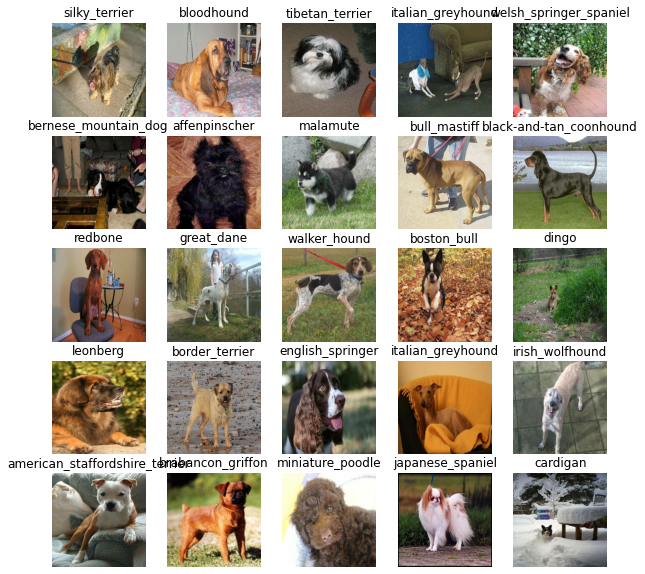

In [ ]:

# NOw visualize the data in a training batch
show_25_images(train_images,train_labels)   #every time we ll ge different op as we shuffled training data in traning_batch

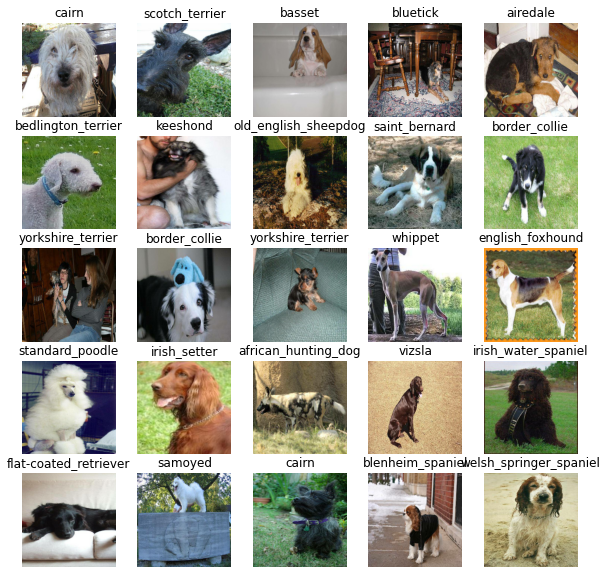

In [ ]:
# Now visualize ouor validation sets 
val_images,val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images,val_labels)  #validation batch wasn't shuffled , so will get same op

In [ ]:
# Now we have our data into the form of tensors 
#images in the form of tensors and lables in teh form of tensors  

#Step 1 is done , get data ready

## Building a Model 

Before we build a model, there are few things we need to define:
* The input shape(our images shape,in the form of Tensors) to our model
* The output shape(image labels, in the form of Tensors) to our model.
* The URL of the model we want to use. https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5 

we will not build a model from scratch(deep lwearning), it will take a long time... 
Instaed we gonna use the alraedy trained model in TensorFlow Hub and use it to train our patterns (Transfer learning)

In [ ]:

# setup input shape to the model
INPUT_SHAPE=[None, IMG_SIZE,IMG_SIZE,3]  # batch,height,width, colur channel

# setup output shape of our model
OUTPUT_SHAPE=len(unique_breeds)

#setup mmodel URL for TEnsorFlow HUb
MODEL_URL="https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Now we have got our inputs,outputs and model ready to go. 
Let's put them togther into a keras deep learning model!

knowing this, Let's creat the function which:
* Takes the input shape, output shape and the model we've choosen as parameters
* Defines the layers in a keras model in sequential fashion (do this first,then this, the this)
* Compiles the model(says it should be evaluated and improved)
* Builds the model(tells the model the input shape it'll be getting)
* Returns the mdoel 

All of the steps can be found here:
https://www.tensorflow.org/guide/keras/sequential_model 

In [ ]:
# create a function which builds a keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # setup the model 
  model=tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL),  #Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                            activation="softmax")    # LAyer 2(output layer)
  ])

  #compile the model 
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model 
  model.build(INPUT_SHAPE)

  return model 

In [ ]:
model=create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
outputs=np.ones(shape=(1,1,1280))
outputs   #we dont need 1280, this is why Dense layers comes in , our output layers comes in   (1*1*1280) single array of size 1280
    #our output has 120 labels, thats breed names we have 
    #instead of 1280, we want op shape of 120

## Creating Callbacks

Callbacks are helper functions a model can use during training to do such things as save its progress, check its progress, or stop training early if a model stops improving.

we'll create two callbacks, one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long. 

## TensorBoard Callbacks 

To setup a TensorBoard Callbacks, we need to do 3 things:

1. Load teh TenosrBoard notebook extension 
2. Create a TensorBoard callbacks which is able to save logs to a directory and pass it to our model's `fit()` function.
3. Visualize our models training logs with `%tensorboard` magic function.( we'll do this after training model)


In [ ]:
# Load TensorBoard notebook extension 
%load_ext tensorboard

# load TensoeBoard extention to colab notebook 


In [ ]:
import datetime 

#create a function to build a TEnsorBoard callbacks 
def create_tensorboard_callback():
  #create a log directory for storing TesnorBoard logs 
  logdir=os.path.join("drive/MyDrive/Dog-vision/logs",
                      #Make it so the logs get tracked whenever we run an experiment
                      datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)


## Early stopping callbacks

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving 
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping 

In [ ]:

# Creat early stopping callbacks.
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                patience=3)

## Training a Model (on subset of data)

our first model is only going to train on 1000 images , to make sure everything is working 

In [ ]:
NUM_EPOCHS=100 #@param{type:"slider",min:10,max:100,step:10}

#epoch is simply the number of passes, or iterations, that a given data set is trained on.
# 1 epoch means,giving our model only 1 chance to go through all training data, and figure outs patterns   

In [ ]:
# check to make sure we're still runnig on a GPU
print("GPU", "avalianble (YESSSS!!!!)" if tf.config.list_physical_devices("GPU") else "not available: (")

GPU not available: (


Let's create function which trains a model. 

* Create a mmodel using `create_model()`
* setup a TensorBoard callbacks using a `create_tensor_board_callback()`
* call the `fit()` function on our model passing it the training data, validation data, number of epochs to train for (`NUM_EPOCKS`) and the callbacks we'd like to use 
* Return the model 

In [ ]:
# Build a function to train and return a trained model 
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  #create a model 
  model=create_model()

  # create new TesnorBoard session everytime we train a model 
  tensorboard=create_tensorboard_callback()

  #Fit the model to the data pasing it the callbacks we created 
  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  # Return the fitted model 
  return model 

In [ ]:
# Fit the model to the data 
model=train_model()

**Questions:** It looks like our model is overfitting because it's performing far better on the training dataset than the validation datasets,
what are some ways to prevent model overfitting in deep learning neural networks?

**NOTE:** Overfitting to begin with is a good thing it means our model is learning!!!


## Checking The TensorBoard logs

The TEnsorBoard magic function(`%tensorboard`) will access the logs directory we created earlier and viualize its contents



In [ ]:
%tensorboard --logdir drive/MyDrive/Dog-vision/logs   #is there is any space we can escape it using backslace \

In [ ]:

# over model is overfitted ,

##MAking and Evaluating predictyion using a traing model 

just like we did in scikit learn using prediction function 

In [ ]:
val_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# make prediction on validation data(not used to train  on) 
predictions= model.predict(val_data,verbose=1) # verbose=1 meaning we will get progress bar
predictions 

7/7 [==============================] - 22s 3s/step


array([[0.00022724, 0.03636751, 0.01251406, ..., 0.0079621 , 0.00665336,
        0.00993273],
       [0.00545335, 0.03604491, 0.00152354, ..., 0.00306603, 0.00236055,
        0.01144513],
       [0.00085731, 0.03377985, 0.00146217, ..., 0.00443559, 0.01972757,
        0.00101062],
       ...,
       [0.01471906, 0.00343499, 0.00542893, ..., 0.00182941, 0.02225273,
        0.00584704],
       [0.00195897, 0.0179925 , 0.01166901, ..., 0.00860071, 0.01011473,
        0.01048272],
       [0.06183453, 0.01036626, 0.00125107, ..., 0.00064971, 0.00131876,
        0.000657  ]], dtype=float32)

In [ ]:
predictions.shape  #200 validation images and 120 labels as breed types  ## 200 arrays of 120 numbers 

(200, 120)

In [ ]:
len(y_val)

200

In [ ]:
len(unique_breeds)

120

In [ ]:
predictions[0]  # will get 120 predictions values for oth elements #associated probabilitiesd for every single values 

array([0.00022724, 0.03636751, 0.01251406, 0.01212822, 0.00032005,
       0.00096852, 0.00509817, 0.00113448, 0.00197495, 0.00069695,
       0.01436113, 0.00118656, 0.01094918, 0.00326391, 0.00894282,
       0.00439704, 0.00221266, 0.06866688, 0.00881525, 0.01269098,
       0.00052308, 0.00769193, 0.0005346 , 0.01048957, 0.0264789 ,
       0.00574992, 0.0010672 , 0.03729316, 0.01269172, 0.01181358,
       0.00469047, 0.00316016, 0.00521128, 0.00043891, 0.00815823,
       0.00306491, 0.00261696, 0.00616999, 0.00026971, 0.00511227,
       0.00054841, 0.00153028, 0.06626174, 0.00133682, 0.00387078,
       0.00425774, 0.01082271, 0.00615203, 0.02342061, 0.00666361,
       0.06417213, 0.0083024 , 0.00119351, 0.00126936, 0.00039676,
       0.00229872, 0.01288239, 0.02976274, 0.00102137, 0.00105286,
       0.00552091, 0.00396357, 0.00609133, 0.00959899, 0.00446807,
       0.00411701, 0.00157557, 0.00177455, 0.00337026, 0.02277716,
       0.00551837, 0.00263041, 0.01142544, 0.00385866, 0.00356

In [ ]:
len(predictions[0])

120

In [ ]:
np.sum(predictions[0])  #associated probabilites is 1 
      # we have used softmax activation in last layesrs of the model , we are getting total predictions equals 1

1.0

In [ ]:
np.sum(predictions[1])

1.0

In [ ]:
# First predictions 
index=42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"MAx index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[0.00577792 0.02615603 0.00150765 0.00274634 0.00169977 0.00134755
 0.00173467 0.03919967 0.00395665 0.01647944 0.01298965 0.00573621
 0.00137478 0.0020813  0.00089215 0.00190386 0.00335324 0.02128437
 0.00306187 0.01362339 0.00190241 0.03695568 0.00260857 0.03110156
 0.00361815 0.00395022 0.00154944 0.00844201 0.00105092 0.00131795
 0.00897399 0.04189317 0.00102266 0.00110175 0.00579307 0.01052946
 0.00110002 0.00125868 0.04471843 0.00132264 0.01594854 0.00319409
 0.02021786 0.02915457 0.0041779  0.00931009 0.00086231 0.03272938
 0.00066278 0.00812022 0.00053387 0.05577231 0.02119994 0.00114339
 0.00051639 0.00520389 0.00066797 0.00069126 0.00046694 0.00713939
 0.00257047 0.00150984 0.00015362 0.00058119 0.00393794 0.00034302
 0.00424894 0.00599835 0.00235749 0.00236403 0.0035219  0.00379441
 0.00662868 0.01136404 0.00145992 0.00074836 0.00272763 0.00723395
 0.0002979  0.01523126 0.00494822 0.02200426 0.01095362 0.00309202
 0.00486394 0.02291607 0.02474505 0.00026489 0.00679357 0.0038

In [ ]:
unique_breeds[113]

'walker_hound'

Having the above functionality is great but we want to be able to do it at scale.
And it would be even better if we could see the image the prediction is being made on...

**NOTE:** Prediction probability is also known as confidence levels.


In [ ]:
# Turn prediction probabilities into their respective label(easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities 
pred_label=get_pred_label(predictions[81])
pred_label

'tibetan_terrier'

since our validation data is still in a batch dataset.
we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validation labels(truth labels)

In [ ]:
val_data #our validation data is in a batch form 

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a function to unbatch dataset
def unbatchify(data):
  """
  Takes a batched dataset of (images,label) Temnsors and returns separate arrays of images and labels.
  """
  images=[]
  labels=[]
  #Loop through unbatched data
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])
  
  return images,labels

# Unbatchify the validation data
val_images,val_labels=unbatchify(val_data)
val_images[0],val_labels[0]

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(val_images[0])

'vizsla'

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
images_=[]
labels_=[]

#Loop through unbatched data 
for image,label in val_data.unbatch().as_numpy_iterator():
  # print(image)  #image in the form of preprocessed images that we did it using pre_process function
  # print(label)

  images_.append(image)
  labels_.append(label)

images_[0],labels_[0]


(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

In [ ]:
get_pred_label(labels_[0])

'cairn'

In [ ]:
get_pred_label(predictions[0])  #prediction is right , predicted value is equals to ground truth value 

'border_terrier'

Now we have ot ways to get:
* Prediction Labels
* Validation lables(truth labels)
* Validation images

Let's make some function to make these all a bit more visualize.

we'll create a function which:
* Takes an array of prediction probabilities,an array of truth lables and an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, it's predicted probaility, the truth label and the target images on the single plot. 

In [ ]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  """
  View the prediction, ground truth and image for sample n
  """
  pred_prob, true_label, image= prediction_probabilities[n], labels[n], images[n]

  # Get the pred label 
  pred_label=get_pred_label(pred_prob)

  #Plot image and remove ticks 
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if tthe prediction is right or wrong
  if pred_label==true_label:
    color="green"
  else:
    color="red"

  # Change plot title to be predicted, probability of prediction and truth label 
  plt.title("{} {:2.0f}% {}".format(pred_label,
                              np.max(pred_prob)*100,
                              true_label),
                              color=color)
            
  pass


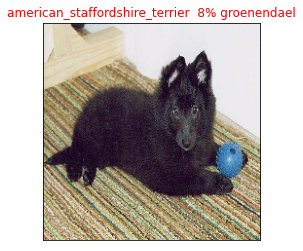

In [ ]:
plot_pred(prediction_probabilities=predictions,
          labels=val_labels,
          images=val_images,
          n=77)

Now we've got one function to visualize our models top prediction,let's make another to view our models top 10 predictions

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer 
* Find the prediction using `grt_pred_label()`
* Find the top 10:
  * Prediction probabilities indexes 
  * prediction probabilities values 
  * Prediction labels

* Plot the top 10 prediction probability values and lebels, coloring the true label green.

In [ ]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  """
  Plus the top 10 highest prediction confedences along with the truth label for sample n
  """
  pred_prob, true_label= prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label= get_pred_label(pred_prob)

  # Find the top 10 predcitions confidence indexes
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  #Find the top 10 predictions confidence values
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  #Find the top 10 prediction labels
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]


  #setup plot 
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),
                   top_10_pred_values,
                   color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change the colour of true label 
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color("green")
  else:
    pass

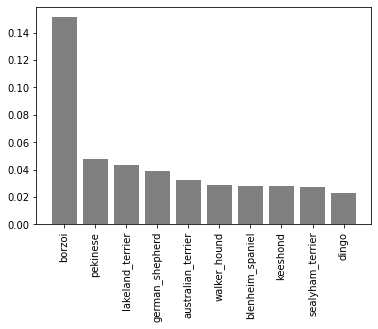

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

In [ ]:
predictions[0].argsort()

array([  0, 116,  38,   4,  85,  54,  81,  33,  20,  22,  40, 102, 112,
         9,   5,  58,  75,  59,  26,   7,  11,  52,  53, 107,  43, 110,
        41,  66, 100,  67,   8,  94,  16, 103,  91,  55, 104,  36,  71,
        77,  79,  35,  82,  31, 106,  13,  89,  68, 108, 114, 111,  74,
        73,  44,  61,  83,  65,  45,  15,  64,  30,   6,  39,  32, 113,
        70,  60, 101,  25,  88,  62,  47,  37,  78, 118,  49,  87,  98,
        76,  99,  21,  90, 117,  95,  34,  51,  18,  14,  63, 109, 119,
        96, 115,  23,  46,  93,  12, 105,  86,  72,  80,  29,   3,   2,
        19,  28,  56,  10,  84,  69,  48,  24,  57,  92,   1,  97,  27,
        50,  42,  17])

In [ ]:
predictions[0].argsort()[-10]

48

In [ ]:
predictions[0].argsort()[-10:]  #top 10 predicted indexes 

array([48, 24, 57, 92,  1, 97, 27, 50, 42, 17])

In [ ]:
predictions[0].argsort()[-10:][::-1]   #top 10 predicted indexes for prediction 0

array([17, 42, 50, 27, 97,  1, 92, 57, 24, 48])

In [ ]:
predictions[0][predictions[0].argsort()[-10:][::-1]]  # top 1o predicted values # decdending order

array([0.06866688, 0.06626174, 0.06417213, 0.03729316, 0.03693931,
       0.03636751, 0.03543683, 0.02976274, 0.0264789 , 0.02342061],
      dtype=float32)

In [ ]:
predictions[0].max()

0.068666875

In [ ]:
unique_breeds[predictions[0].argsort()[-10:][::-1]]   #Top 10 predicted labels for predicition 0

array(['border_terrier', 'entlebucher', 'gordon_setter', 'cardigan',
       'scottish_deerhound', 'afghan_hound', 'saint_bernard',
       'irish_terrier', 'brittany_spaniel', 'giant_schnauzer'],
      dtype=object)

Now we've got some function to help us visualize our predictions and evaluate our model, Let's check out a few



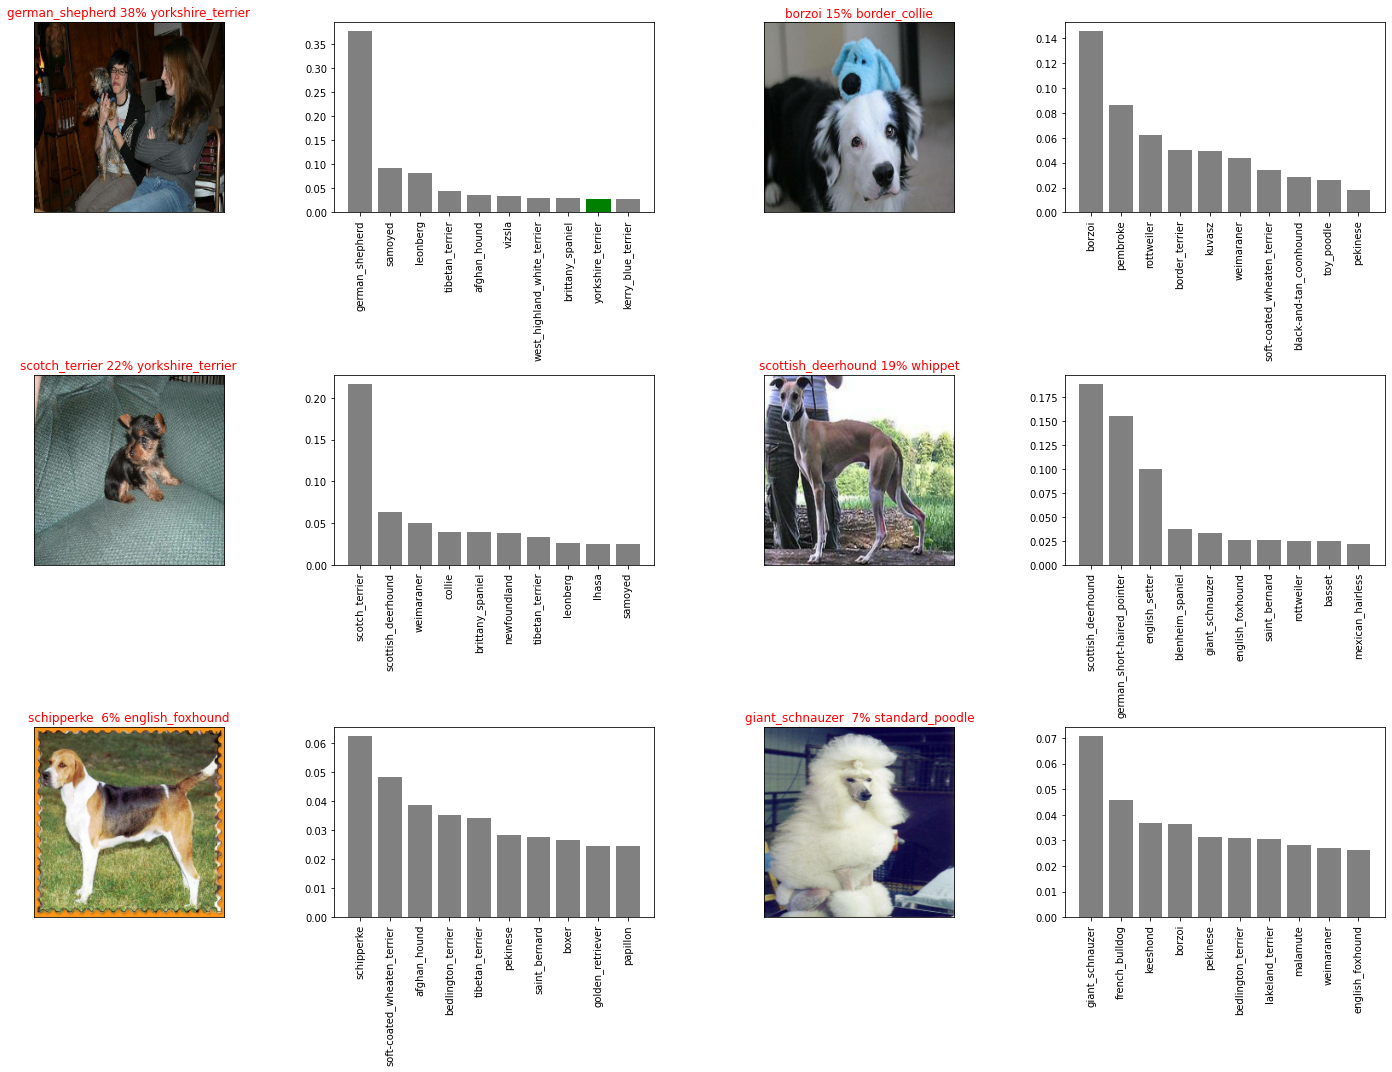

In [ ]:
# Let's check out a few predictions and their different values

i_multiplier=10
num_rows=3
num_cols=2
num_images=num_rows* num_cols

plt.figure(figsize=(10*num_cols,5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  
  plt.subplot(num_rows,2*num_cols,2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                 labels=val_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

** Challenge:** How would you create a confusion matrix with our models predictions and true labels?


## Saving and Reloading a trained Model


In [ ]:
# Create a function to save a model 
def save_model(model,suffix=None):
  """
  Saves a given model in a models directory and append a suffix(string)
  """
  #Create a model directory pathname with current time
  modeldir=os.path.join("drive/MyDrive/Dog-vision/models",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path=modeldir+ "-"+ suffix+ ".h5"   # Save format of model 
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Create a function to load a trained model 
def load_model(model_path):
  """
  Loads a saved model from a specified path"""

  print(f"Loading a model from:{model_path}")
  model=tf.keras.models.load_model(model_path,
                                   custom_objects={"KerasLayer":hub.KerasLayer})
  return model 

Now we've got functions to save and load a trained model,
Let's make sure they work!

In [ ]:
# Save our model trained on 1000 images 
save_model(model,suffix="1000-images-mobilenetv2-Adam")

In [ ]:
# Loaded a trained Model 
loaded_1000_image_model=load_model("drive/MyDrive/Dog-vision/models/20221220-01431671500596-1000-images-mobilenetv2-Adam.h5")

In [ ]:
# If we get warning ,it can be ignored as it wont effect. 

In [ ]:
# Evaluate the pre-saved model 
model.evaluate(val_data)

In [ ]:
#Evaluate the laoded model
loaded_1000_image_model.evaluate(val_data)  #These two lines of code gives same output, meaning our loaded model working fine 

## Training a Big Dog Model on the full data 

In [ ]:
len(x),len(y)

(10222, 10222)

In [ ]:
x[:10]

['drive/MyDrive/Dog-vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/Dog-vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/Dog-vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/Dog-vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/Dog-vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/Dog-vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/Dog-vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/Dog-vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/Dog-vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/Dog-vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
y[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(x_train)

800

In [ ]:
# Creat a data batch with the full data set 
full_data=create_data_batches(x,y)

Creating training data batches....


In [ ]:
full_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
# Create a model for full model 
full_model=create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Create full model callbacks 
full_model_tensorboard=create_tensorboard_callback()
# No validation set when training on all the data, so we can't monitor validation accuracy 
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",
                                                           patience=3)


**NOTE:** Running the cell below will take a little while (may be upto 30 minutes for the first epoch)becuase the GPU in the runtime has to load all of the images into memory 

In [ ]:
# Fit the full model to the full data
full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping]) 

In [ ]:
save_model(full_model,suffix="full-image-set-mobilenetv2-Adam")

In [ ]:
#Load the full model 
loaded_full_model=load_model("drive/MyDrive/Dog-vision/models/20221220-23091671577781-full-image-set-mobilenetv2-Adam.h5")

Loading a model from:drive/MyDrive/Dog-vision/models/20221220-23091671577781-full-image-set-mobilenetv2-Adam.h5


In [ ]:
len(x)


10222

## Making Predictions on the Test DAtaset 

Since our model has been trained in the form of tensor batches, to make predictions on the test data, we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which  can take a list of filenames as input and convert them into Tensor batches.

To make the predictions on the test data, we'll:
* Get the test image filenames
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True`(since we does'nt have labels)
* Make a prediction array by passing the test batches to the `predict()` method called on our model.

In [ ]:
#Load test image filenames 
test_path="drive/MyDrive/Dog-vision/test/"
test_filenames=[test_path+ fname for fname in os.listdir(test_path)]
test_filenames[:10]

['drive/MyDrive/Dog-vision/test/e2b808864a5253fd356a9032915447a1.jpg',
 'drive/MyDrive/Dog-vision/test/e1dd78810048dc387573f2ec50e4bb16.jpg',
 'drive/MyDrive/Dog-vision/test/e520e4cd7608c47cd9017bb87e88f334.jpg',
 'drive/MyDrive/Dog-vision/test/e431adb273c1b705e6e85147990f355e.jpg',
 'drive/MyDrive/Dog-vision/test/e5c0666aa15120eba4718ae947a52c45.jpg',
 'drive/MyDrive/Dog-vision/test/e0f9b92adbba451d296678f466732969.jpg',
 'drive/MyDrive/Dog-vision/test/de93f567cf5830e982182435db086b93.jpg',
 'drive/MyDrive/Dog-vision/test/e1fa4eb8a57184773ac11efe0de11e92.jpg',
 'drive/MyDrive/Dog-vision/test/df01edf92d38b334f78bd85460304801.jpg',
 'drive/MyDrive/Dog-vision/test/e1adb64372b1784c01401cb73bb20807.jpg']

In [ ]:
len(test_filenames)

10357

In [ ]:
#create test data batches
test_data=create_data_batches(test_filenames,test_data=True)

Creating test data batches...


In [ ]:
test_data

<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

**NOTE:** Calling `predict()` on our full model and passing it the test data batch will take a long time to run(about an ~1 hr)

In [ ]:
# Make predictions on test data using loaded full model 
test_predictions=loaded_full_model.predict(test_data,         # we got an error, so downloaded from Daniel's resource 
                                           verbose=1)

  1/324 [..............................] - ETA: 35:37

KeyboardInterrupt: ignored

In [ ]:
#Save predictions (Numpy array) to csv file(for acess latter)
#np.savetxt("drive/MyDrive/Dog-vision/preds_array.csv",test_predictions,delimiter=",")


# we are not going to run this cell , it will take about an hour 
# so we have dowloaded from Daniel's work 

In [ ]:
# Load predictions (Numpy array) from csv file 
test_predictions=np.loadtxt("drive/MyDrive/dog-vision-prediction-probabilites-array.csv",delimiter=",")

In [ ]:
test_predictions[:10]

array([[1.61196489e-09, 3.44086413e-12, 2.32834394e-11, ...,
        1.06917716e-13, 1.58530451e-08, 1.52161670e-06],
       [3.17894322e-10, 3.20088262e-14, 1.85374840e-10, ...,
        7.00588814e-08, 1.88822238e-08, 2.56980937e-10],
       [4.27301083e-09, 1.84139528e-13, 1.11784948e-09, ...,
        2.71949238e-12, 2.23927123e-06, 7.41860809e-11],
       ...,
       [4.47232779e-10, 4.28004029e-07, 4.11986996e-08, ...,
        4.65437893e-07, 8.21722967e-10, 8.86002116e-09],
       [3.50528079e-11, 1.94377336e-03, 1.44941642e-10, ...,
        1.56135718e-06, 6.13228721e-08, 7.32120961e-12],
       [1.23221771e-08, 3.08354520e-09, 1.87174110e-10, ...,
        8.16165635e-10, 9.98905063e-01, 6.73740752e-09]])

In [ ]:
test_predictions.shape

(10357, 120)

## preparing test datasets predictions for kaggle 

Looking at kaggle sample submission , we find that it wants our models predictions probability outputs in a DataFrame with an ID and a columns of each different Dog Breed: 
https://www.kaggle.com/competitions/dog-breed-identification/overview/evaluation  


To get the data in this format:
* Craete a pandas data frame with ID coulmn ,as well as a column for each dog breed 
* Add data to the ID column by extracting the test image ID's from their filepaths 
* Add data (the prediction probabilities) to each of the dog breed columns 
* Export the DataFrame as a CSV to submit it to kaggle.


In [ ]:
["id"]+ list(unique_breeds)

['id',
 'affenpinscher',
 'afghan_hound',
 'african_hunting_dog',
 'airedale',
 'american_staffordshire_terrier',
 'appenzeller',
 'australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'bedlington_terrier',
 'bernese_mountain_dog',
 'black-and-tan_coonhound',
 'blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'border_collie',
 'border_terrier',
 'borzoi',
 'boston_bull',
 'bouvier_des_flandres',
 'boxer',
 'brabancon_griffon',
 'briard',
 'brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'cardigan',
 'chesapeake_bay_retriever',
 'chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly-coated_retriever',
 'dandie_dinmont',
 'dhole',
 'dingo',
 'doberman',
 'english_foxhound',
 'english_setter',
 'english_springer',
 'entlebucher',
 'eskimo_dog',
 'flat-coated_retriever',
 'french_bulldog',
 'german_shepherd',
 'german_short-haired_pointer',
 'giant_schnauzer',
 'golden_retriever',
 'gordon_setter',
 'great_dane',
 'great_pyrenees',
 'greater_swiss_mountain_dog',
 'groenen

In [ ]:
# Create a pandas DataFrame with empty columns
preds_df=pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
test_filenames

['drive/MyDrive/Dog-vision/test/e2b808864a5253fd356a9032915447a1.jpg',
 'drive/MyDrive/Dog-vision/test/e1dd78810048dc387573f2ec50e4bb16.jpg',
 'drive/MyDrive/Dog-vision/test/e520e4cd7608c47cd9017bb87e88f334.jpg',
 'drive/MyDrive/Dog-vision/test/e431adb273c1b705e6e85147990f355e.jpg',
 'drive/MyDrive/Dog-vision/test/e5c0666aa15120eba4718ae947a52c45.jpg',
 'drive/MyDrive/Dog-vision/test/e0f9b92adbba451d296678f466732969.jpg',
 'drive/MyDrive/Dog-vision/test/de93f567cf5830e982182435db086b93.jpg',
 'drive/MyDrive/Dog-vision/test/e1fa4eb8a57184773ac11efe0de11e92.jpg',
 'drive/MyDrive/Dog-vision/test/df01edf92d38b334f78bd85460304801.jpg',
 'drive/MyDrive/Dog-vision/test/e1adb64372b1784c01401cb73bb20807.jpg',
 'drive/MyDrive/Dog-vision/test/e6a544a538088cc3f73b432a2da90134.jpg',
 'drive/MyDrive/Dog-vision/test/eb93d2e66035f0e6d51cca097c4a770e.jpg',
 'drive/MyDrive/Dog-vision/test/e8763575a23f1e1a86788b82bd105f07.jpg',
 'drive/MyDrive/Dog-vision/test/ea280d6cb873df2eb683f0a5f13e3dce.jpg',
 'driv

In [ ]:
# Append test image id's to predictions DataFrame
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]    #As we don't need jpg so we sliced it by first elements [0]
test_ids

['e2b808864a5253fd356a9032915447a1',
 'e1dd78810048dc387573f2ec50e4bb16',
 'e520e4cd7608c47cd9017bb87e88f334',
 'e431adb273c1b705e6e85147990f355e',
 'e5c0666aa15120eba4718ae947a52c45',
 'e0f9b92adbba451d296678f466732969',
 'de93f567cf5830e982182435db086b93',
 'e1fa4eb8a57184773ac11efe0de11e92',
 'df01edf92d38b334f78bd85460304801',
 'e1adb64372b1784c01401cb73bb20807',
 'e6a544a538088cc3f73b432a2da90134',
 'eb93d2e66035f0e6d51cca097c4a770e',
 'e8763575a23f1e1a86788b82bd105f07',
 'ea280d6cb873df2eb683f0a5f13e3dce',
 'f1979a55bddde4fda0282da796460f80',
 'f538a1d1a9e50417ea346429ea3e940c',
 'f35c272e3ece87df743552aa517488b0',
 'e850770a6575a34b1c7ad4b401692553',
 'f1230a99088c9bc88bc2989affee43d2',
 'eb448b29df9391fb8b84c88c3a3313e6',
 'f3e62da9f6f0aec7359dc70c139d7266',
 'ec907a287a8aff0cc9d2eab8045d75aa',
 'ebf3e1d5583ceff0a51a8c6a750b367b',
 'f37106dba00385993428e7c557b15805',
 'ed0b66d283d948128c45ce57478ba048',
 'f02444318adc0c1c2360c3bf3bff5709',
 'f3ef677ea2641c7ef7ece6ce1ba11b2f',
 

In [ ]:
os.path.splitext(test_filenames[0])

('drive/MyDrive/Dog-vision/test/e2b808864a5253fd356a9032915447a1', '.jpg')

In [ ]:
preds_df["id"]=test_ids

In [ ]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e2b808864a5253fd356a9032915447a1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e1dd78810048dc387573f2ec50e4bb16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e520e4cd7608c47cd9017bb87e88f334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e431adb273c1b705e6e85147990f355e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e5c0666aa15120eba4718ae947a52c45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Add the predictions probabilities to each dog breed column 
preds_df[list(unique_breeds)]=test_predictions 
preds_df.head()       # we get an error as test images is 10359 and here we have results for 10357 , I have sorted everything out as I got 2 unnecessry folders inside my test folder 

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e2b808864a5253fd356a9032915447a1,1.611965e-09,3.440864e-12,2.328344e-11,1.407994e-12,5.980330e-09,2.145339e-11,5.328517e-10,1.764934e-10,4.491057e-11,...,8.200658e-09,4.056766e-08,2.202154e-11,3.074556e-12,7.080598e-12,3.024534e-09,2.991727e-07,1.069177e-13,1.585305e-08,1.521617e-06
1,e1dd78810048dc387573f2ec50e4bb16,3.178943e-10,3.200883e-14,1.853748e-10,1.954662e-13,8.682216e-07,3.362278e-07,2.264711e-06,9.995926e-01,1.876677e-10,...,3.441671e-07,1.129437e-04,6.675200e-09,1.690707e-06,6.804413e-10,5.923428e-09,5.574148e-09,7.005888e-08,1.888222e-08,2.569809e-10
2,e520e4cd7608c47cd9017bb87e88f334,4.273011e-09,1.841395e-13,1.117849e-09,1.106639e-10,7.225005e-11,1.169239e-05,7.223256e-07,5.553372e-04,9.785655e-11,...,3.530463e-09,4.605002e-05,9.586189e-12,2.740325e-08,8.798643e-12,2.793681e-08,1.502214e-07,2.719492e-12,2.239271e-06,7.418608e-11
3,e431adb273c1b705e6e85147990f355e,5.227723e-14,3.371553e-14,1.638175e-11,5.283554e-12,7.160043e-08,1.832600e-13,6.625124e-13,1.087913e-13,8.482403e-11,...,5.968796e-12,1.492889e-13,2.230498e-06,4.158368e-10,9.999646e-01,3.224581e-13,1.426521e-11,2.974644e-12,8.130380e-13,6.134530e-11
4,e5c0666aa15120eba4718ae947a52c45,9.613753e-11,1.304277e-08,1.246931e-08,1.478856e-07,6.658420e-09,6.374474e-12,2.422878e-05,4.128350e-09,1.767556e-04,...,1.207746e-06,2.052871e-08,6.508744e-13,2.080402e-10,1.428936e-09,5.703394e-08,1.541623e-06,2.052792e-05,3.110282e-04,1.318874e-06


In [ ]:
# save our predictions dataframe to csv for submission to kageele
preds_df.to_csv("drive/MyDrive/Dog-vision/ful_model_predictions_submission_1_mobilenetv2.csv",
                index=False)

## Making predictions of custom images 

To make predictions on custom images, we'll:
* get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()` and lables, we set the `test_data` parameter to `True`.
* Pass the custom image data batch to our model's `predict()` method.
* convert the prediction output probabilities to predictions labels.
* Compare the predicted labels to custom images 

In [ ]:
# get custom images filepaths 

custom_path="drive/MyDrive/Dog-vision/custom_images "
custom_image_paths=[custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['drive/MyDrive/Dog-vision/custom_images image1.jpg',
 'drive/MyDrive/Dog-vision/custom_images images.jpg',
 'drive/MyDrive/Dog-vision/custom_images image2.jpg']

In [ ]:
# turn custom images into Data Batches 
custom_data=create_data_batches(custom_image_paths,test_data=True)
custom_data

Creating test data batches...


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make prediction on the custom data 
custom_preds=loaded_full_model.predict(custom_data)


NotFoundError: ignored

In [ ]:
custom_preds.shape

NameError: ignored

In [ ]:
# get custom image prediction labels 
custom_pred_lables=[get_pred_label(custom_preds[i]) for i in range (len(custom_preds))]
custom_pred_lables

NameError: ignored

In [ ]:
# Get custom images (our unbatchify() function won't work since there aren't labels....)
custom_images=[]
#Loop theough unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

NotFoundError: ignored

In [ ]:
# Check custom predictions 
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

<Figure size 720x720 with 0 Axes>